### EXERCISE 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

image_path = './data/polimi_compress.jpg'
img = imread(image_path)

img_RGB = np.array([np.array(img[:, :, i], dtype=np.float64)/255 for i in range(3)])
img_RGB.shape

(3, 375, 800)

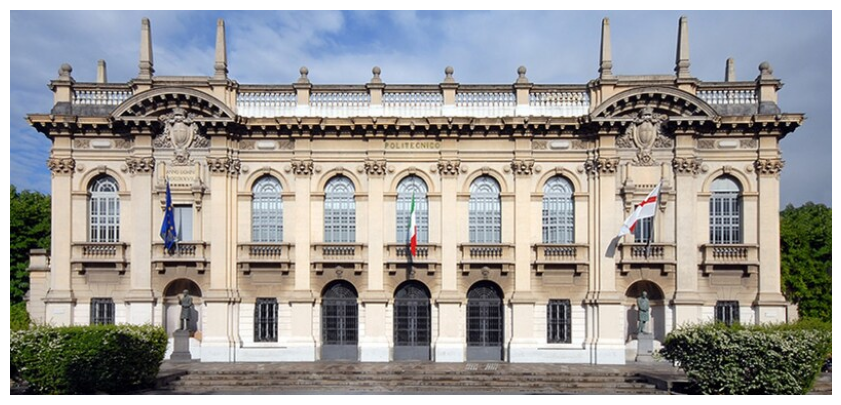

In [2]:

def plot_image(RGB, ax=None):
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(12, 5))
    ax.imshow(np.clip(np.stack(RGB, axis=2), 0, 1))
    plt.axis('off')

plot_image(img_RGB)

In [3]:
damage_fraction = 0.7

np.random.seed(0)
mask_remove = np.random.choice(a=[True, False], 
                                size=(img.shape[0], img.shape[1]), 
                                p=[damage_fraction, 1 - damage_fraction])
mask_remove

array([[ True, False,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False,  True],
       [False,  True,  True, ...,  True, False,  True],
       ...,
       [ True, False,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True, False],
       [False, False,  True, ...,  True,  True,  True]])

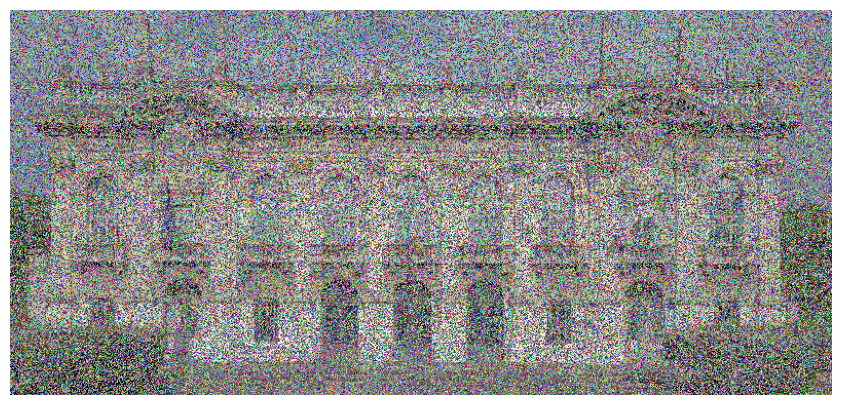

In [4]:
# Now, randomly replace 70% of the pixels with random colors.
damage_fraction = 0.7

np.random.seed(0)
mask_remove = np.random.choice(a=[True, False], 
                                size=(img.shape[0], img.shape[1]), 
                                p=[damage_fraction, 1 - damage_fraction])
mask_keep = np.logical_not(mask_remove)

img_damaged_RGB = [img_RGB[i].copy() for i in range(3)]
for i in range(3):
    img_damaged_RGB[i][mask_remove] = np.random.rand(np.sum(mask_remove))

plot_image(img_damaged_RGB)


In [5]:
img = np.array([
    [[255, 0, 0], [0, 255, 0]],   # Row 1: Red and Green
    [[0, 0, 255], [255, 255, 0]]  # Row 2: Blue and Yellow
])


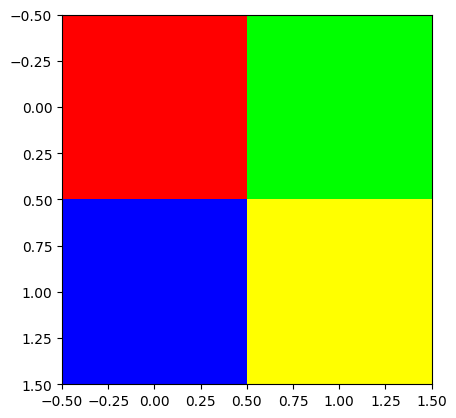

In [6]:
plt.imshow(img)

### Implement SVT

In [ ]:

def SVT(img_ch, s_treshold):
    max_iter= 20
    tol= 1.0e-6

    img = img_ch.copy() # to copy without creating a references (because if not when we modify x hat we modify also x full)
    for k in range(max_iter):
        img_old = img.copy() # A copy of the current X_hat to track changes between iterations
        U,s,VT = np.linalg.svd(img, full_matrices = False)
        s[s < s_treshold] = 0 #mask for thresholding, so we can get rid of the singular values below the threshold
        img = U @ np.diag(s) @ VT # reconstuct using the multiplication of the components of the svd with the sigma truncated
        img[mask_keep] = img_ch[mask_keep] #put in the positions where we have the data, the correct data 
        increment = np.linalg.norm(img - img_old)

        if increment < tol:
            print("Toleranche achieved!")
            break

        print('======= iteration %d (increment %1.2e)' % (k, increment))

    return img



In [9]:
thresholds = [2, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]
reconstructed_imgs = list()
RMSE_thresh = list()

for s_thresh in thresholds:
    print("Current threshold: %d" % s_thresh)
    img_reconstructed = img_damaged_RGB.copy()
    RMSE = 0.0
    for i in range(3):
        img_reconstructed[i] = SVT(img_damaged_RGB[i], s_thresh)
        RMSE += np.sqrt(np.mean((img_reconstructed[i] - img_RGB[i]) ** 2))

    reconstructed_imgs.append(img_reconstructed)
    RMSE_thresh.append(RMSE)

Current threshold: 2
Toleranche achieved!
Toleranche achieved!
Toleranche achieved!
Current threshold: 5
======= iteration 0 (increment 3.21e+01)
======= iteration 1 (increment 1.19e+01)
======= iteration 2 (increment 7.60e+00)
======= iteration 3 (increment 5.19e+00)
======= iteration 4 (increment 2.07e+00)
======= iteration 5 (increment 4.34e+00)
======= iteration 6 (increment 1.44e+00)
======= iteration 7 (increment 7.57e-01)
======= iteration 8 (increment 4.52e-01)
======= iteration 9 (increment 2.85e-01)
======= iteration 10 (increment 1.86e-01)
======= iteration 11 (increment 1.24e-01)
======= iteration 12 (increment 8.39e-02)
======= iteration 13 (increment 5.74e-02)
======= iteration 14 (increment 3.96e-02)
======= iteration 15 (increment 2.76e-02)
======= iteration 16 (increment 1.93e-02)
======= iteration 17 (increment 1.36e-02)
======= iteration 18 (increment 9.58e-03)
======= iteration 19 (increment 6.80e-03)
======= iteration 20 (increment 4.84e-03)
======= iteration 21 (i

In [ ]:
n_images = len(reconstructed_imgs)
fig, axs = plt.subplots(nrows=n_images, ncols=3, figsize=(20, 3 * n_images))
axs = axs.flatten()
for i in range(n_images):
    plot_image(reconstructed_imgs[i], axs[3 * i])
    axs[3 * i].set_title(thresholds[i])
    plot_image(img_damaged_RGB, axs[3 * i + 1])
    plot_image(img_RGB, axs[3 * i + 2])